# CHAPTER-05. 불리언 인덱싱


## 불리언 통계량 계산



In [1]:
import pandas as pd
import numpy as np

movie = pd.read_csv("../data/movie.csv", index_col= "movie_title")
movie.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
movie_2_hours = movie["duration"] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [3]:
movie_2_hours.sum()

1039

In [4]:
movie_2_hours.mean() # 비율

0.2113506916192026

In [5]:
movie["duration"].isna().value_counts() # nan 값은 위의 boolean operation 으로 false 가 나와서 조금 맞지 않음 처리 해줘야 함.

False    4901
True       15
Name: duration, dtype: int64

In [6]:
movie["duration"].dropna().gt(120).mean()

0.21199755152009794

In [7]:
actors = movie[["actor_1_facebook_likes", "actor_2_facebook_likes"]].dropna()
actors


,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
Avatar,1000.0,936.0
Pirates of the Caribbean: At World's End,40000.0,5000.0
Spectre,11000.0,393.0
The Dark Knight Rises,27000.0,23000.0
Star Wars: Episode VII - The Force Awakens,131.0,12.0
...,...,...
Signed Sealed Delivered,637.0,470.0
The Following,841.0,593.0
A Plague So Pleasant,0.0,0.0


In [8]:
(actors["actor_1_facebook_likes"] > actors["actor_2_facebook_likes"])

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens     True
                                              ...  
Signed Sealed Delivered                        True
The Following                                  True
A Plague So Pleasant                          False
Shanghai Calling                               True
My Date with Drew                              True
Length: 4903, dtype: bool

In [9]:
(actors["actor_1_facebook_likes"] > actors["actor_2_facebook_likes"]).mean() # 배우1 좋아요가 더 많은 영화의 비율

0.9777687130328371

## 다중 불리언 조건 구축
- 논리 연산자 \&, \|, \~ 사용
- 연산자 우선순위에 따라 원하지 않게 동작할 수 있으므로 괄호 사용


In [10]:
criteria1 = movie["imdb_score"] > 8
criteria2 = movie["content_rating"] == "PG-13"
criteria3 = (movie["title_year"] < 2000) | (movie["title_year"] > 2009)

criteria_final = criteria1 & criteria2 & criteria3
criteria_final.value_counts()


False    4893
True       23
dtype: int64

## 불리언 인덱싱을 사용한 필터링
- 불리언 series 를 인덱스 연산자에 전달


In [11]:
movie[criteria_final].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [12]:
movie.loc[criteria_final, ["imdb_score", "title_year"]] # loc 에 불리언 시리즈, 컬럼 전달 가능


,imdb_score,title_year
movie_title,,
The Dark Knight Rises,8.5,2012.0
The Avengers,8.1,2012.0
Captain America: Civil War,8.2,2016.0
Guardians of the Galaxy,8.1,2014.0
Interstellar,8.6,2014.0
Inception,8.8,2010.0
The Martian,8.1,2015.0
Jurassic Park,8.1,1993.0
Forrest Gump,8.8,1994.0


## 인덱스를 사용한 불리언 인덱싱의 복제


In [13]:
college = pd.read_csv("../data/college.csv")
college[college["STABBR"] == "TX"].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [14]:
college2 = college.set_index("STABBR")
college2.loc["TX"].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [15]:
%timeit college[college["STABBR"] == "TX"].head()

1.48 ms ± 817 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit college2.loc["TX"].head() # 불리언 인덱싱 인덱스 선택에 비해 오래걸림.

450 µs ± 10.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%timeit college2 = college.set_index("STABBR") # 인덱스 설정 시간도 합치면 더 오래걸리긴 하는데 인덱스 여러번 쓸거면 인덱스 미리 설정해서 하는게 좋아 보임

989 µs ± 78.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 정렬된 고유 인덱스를 사용한 선택
- 정렬되거나 고유한 인덱스를 사용할 때 인덱스 선택이 빨라진다.


In [18]:
college2.index.is_monotonic

False

In [19]:
college3 = college2.sort_index()
college3.index.is_monotonic_increasing

True

In [20]:
%timeit college2.loc["TX"] # 불리언 보다는 약 세배정도 빠름

398 µs ± 4.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit college3.loc["TX"] # 거의 10배 빨라짐.

58.7 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [22]:
college_unique = college.set_index("INSTNM")
college_unique.index.is_unique

True

In [23]:
stanford_name = "Stanford University"
college[college["INSTNM"] == stanford_name]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [24]:
college_unique.loc[[stanford_name]]

,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [25]:
%timeit college[college["INSTNM"] == stanford_name]

695 µs ± 4.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%timeit college_unique.loc[[stanford_name]]

364 µs ± 7.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%timeit college_unique.loc[stanford_name]

119 µs ± 409 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 인덱스 선택에 차이가 나는 이유
- 정렬x, 유니크x : 모든 값 검사해야 됨
- 정렬o: 바이너리 서치
- 유니크o: 해시 검색


In [28]:
college.index = college["CITY"] + ", " + college["STABBR"]
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Normal, AL",Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
"Birmingham, AL",University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
"Montgomery, AL",Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
"Huntsville, AL",University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
"Montgomery, AL",Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [29]:
college =college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [30]:
college.loc["Miami, FL"].head() # 이거를 불리언 인덱싱으로 하려면 오래 걸림.


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


## 주가 전망


In [31]:
slb = pd.read_csv("../data/slb_stock.csv", index_col= "Date")
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [32]:
slb_close = slb["Close"]
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [33]:
upper_10 = slb_summary.loc["90%"]
lower_10 = slb_summary.loc["10%"]
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria] 
# slb_top_bottom_10.sort_values() # 상위 10퍼와 하위 10퍼


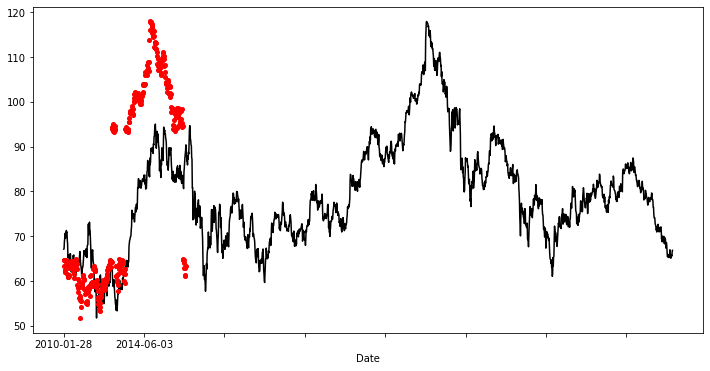

In [34]:
import matplotlib.pyplot as plt

slb_close.plot(x = criteria.index, color = "black", figsize = (12, 6))
slb_top_bottom_10.plot(x = criteria.index, marker = "o", style = " ", ms = 4, color = "red")

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y = [lower_10, upper_10], xmin= xmin, xmax= xmax, color = "gray")


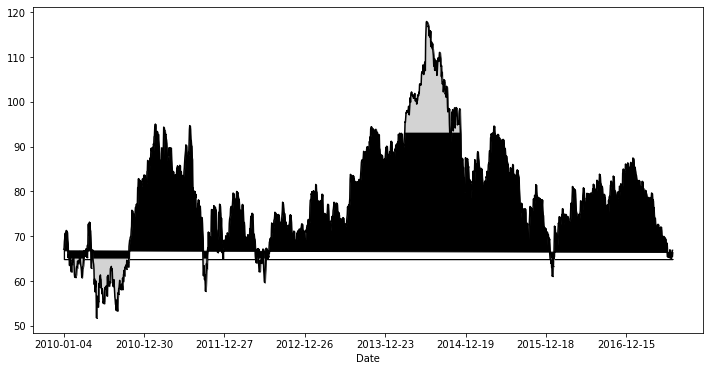

In [35]:
slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], 
           xmin=xmin, xmax=xmax,color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index,y1=lower_10,
                 y2=slb_close.values, where=slb_close < lower_10,
                 color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10, 
                 y2=slb_close.values, where=slb_close > upper_10,
                 color='lightgray')

## SQL WHERE 절 해석
- 여성, 소방관 또는 경찰, 기본급 8만~12만 달러


In [36]:
employee = pd.read_csv("../data/employee.csv")
employee["DEPARTMENT"].value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [37]:
employee["BASE_SALARY"].describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int64

In [38]:
employee["GENDER"].value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [39]:
depts = ["Houston Police Department-HPD", "Houston Fire Department (HFD)"]
criteria_dept = employee["DEPARTMENT"].isin(depts)
criteria_gender = employee["GENDER"] == "Female"
criteria_sal = (employee["BASE_SALARY"] >= 80000) & (employee["BASE_SALARY"] <= 120000)
# between(80000, 120000) 과 같음

criteria_final = (criteria_dept & criteria_gender & criteria_sal)
selected_cols = ["UNIQUE_ID", "DEPARTMENT", "GENDER", "BASE_SALARY"]

employee.loc[criteria_final, selected_cols]

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0
564,564,Houston Police Department-HPD,Female,81239.0
595,595,Houston Police Department-HPD,Female,99953.0
937,937,Houston Police Department-HPD,Female,81239.0
954,954,Houston Police Department-HPD,Female,91181.0
1118,1118,Houston Police Department-HPD,Female,104455.0


## 주식 시장 수익률의 정규성 검정



In [40]:
amzn = pd.read_csv("../data/amzn_stock.csv", index_col="Date", parse_dates=["Date"])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [41]:
amzn_daily_return = amzn["Close"].pct_change() # 전 칼럼에 비해 변화율
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

<AxesSubplot:>

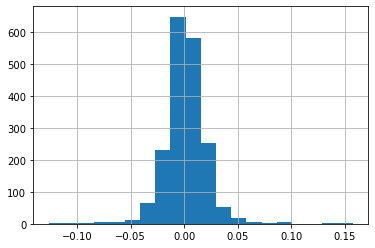

In [42]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins = 20)

In [43]:
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)
abs_z_score

Date
2010-01-05    0.233456
2010-01-06    0.975694
2010-01-07    0.920188
2010-01-08    1.299686
2010-01-11    1.274043
                ...   
2017-07-11    0.181830
2017-07-12    0.563398
2017-07-13    0.357731
2017-07-14    0.004223
2017-07-17    0.350023
Name: Close, Length: 1895, dtype: float64

In [44]:
pcts = [abs_z_score.lt(i).mean() for i in range(1, 4)]
pcts

[0.7873350923482849, 0.9562005277044855, 0.9846965699208443]

## query 메서드를 사용한 불리언 인덱싱의 가독성 개선
- 복잡한 필터


In [45]:
qs = "DEPARTMENT in @depts and GENDER == 'Female' and 80000 <= BASE_SALARY <= 120000"
# 파이썬 변수는 @ 로 참조 가능, 이중 부등식 한번에 표현 가능, and or not 사용 가능
emp_filtered = employee.query(qs)
emp_filtered[selected_cols].head()


,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [46]:
top10_depts = employee["DEPARTMENT"].value_counts().index[:10].tolist()
# top10_depts
employee.query("DEPARTMENT in @top10_depts")["DEPARTMENT"]

1                              Library
2        Houston Police Department-HPD
3        Houston Fire Department (HFD)
5        Houston Police Department-HPD
6       Public Works & Engineering-PWE
                     ...              
1995     Houston Police Department-HPD
1996     Houston Fire Department (HFD)
1997     Houston Police Department-HPD
1998     Houston Police Department-HPD
1999     Houston Fire Department (HFD)
Name: DEPARTMENT, Length: 1799, dtype: object

## Where 메서드를 사용한 Series 보존
- 조건에 안맞는거 제거하지 않고 누락값이나 다른것으로 대체


In [47]:
fb_likes = movie["actor_1_facebook_likes"].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [48]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]).astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int64

<AxesSubplot:>

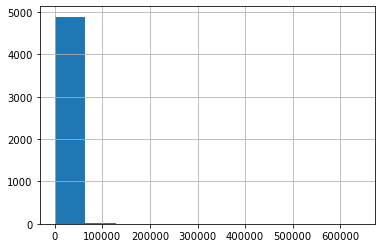

In [49]:
fb_likes.hist()

In [50]:
criteria_high = fb_likes < 20000
criteria_high.mean() # 2만 이하가 90퍼 이상임

0.9085353432470972

In [51]:
fb_likes.where(criteria_high, other = 20000).head() # other 안주면 nan 으로, 주면 그 값으로 false 인 애들 대체

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [52]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other = 20000).where(criteria_low, other = 300)
fb_likes_cap.head() # 300 이상 2만 이하로 상/하 한 둠

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

<AxesSubplot:>

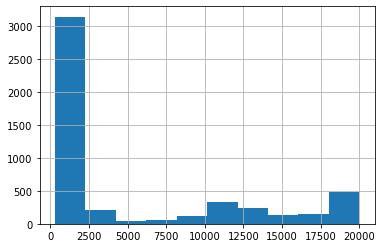

In [53]:
fb_likes_cap.hist() #데이터 범위가 좀더 좁아져서 시각적으로 보기 쉬워짐


In [54]:
fb_likes_cap2 = fb_likes.clip(lower = 300, upper = 20000) # clip 쓰면 쉬움
fb_likes_cap2.equals(fb_likes_cap)


True

## DataFrame 행 마스크
- where 메서드와 정반대 기능 하는 mask 메서드.


In [55]:
c1 = movie["title_year"] >= 2010
c2 = movie["title_year"].isnull()
criteria = c1 | c2

movie_mask = movie.mask(criteria).dropna(how="all")
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [56]:
movie_boolean = movie[movie["title_year"] < 2010]
movie_mask.equals(movie_boolean)

False

In [57]:
movie_mask.shape == movie_boolean.shape

True

In [58]:
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [59]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype= False)
# 오류 없으면 동일하다는 뜻.

## 불리언, 정수 위치, 레이블을 이용한 선택

- iloc, loc 인덱서에 불리언 인덱싱을 사용해도 된다.


In [60]:
c1 = movie["content_rating"] == "G"
c2 = movie["imdb_score"] < 4
criteria = c1 & c2
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [61]:
movie_loc.equals(movie[criteria]) # 불리언을 [] 연산자에 넣는것과 loc 인덱서에 넣는것이 동일

True

In [62]:
movie_iloc = movie.iloc[criteria.values] # 불리언 ndarray
movie_iloc.equals(movie_loc)

True

In [63]:

criteria_cols = movie.dtypes == np.int64
movie.loc[:, criteria_cols].head()


,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [64]:
cols = ["content_rating", "imdb_score", "title_year", "gross"]
movie.loc[criteria, cols]


,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


In [65]:
col_index = [movie.columns.get_loc(col)for col in cols]
col_index

[20, 24, 22, 8]

- iloc, loc 인덱서 모두 불리언 인덱싱 할 수 있는데 iloc 에는 series 전달 못하고 ndarray 만 전달 가능.

In [66]:
movie.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
